In [1]:
# Group Members:
# Fauzan Amjad - fa408
# Moeez Shahid - ms2978
# Mahad Rauf - mar648
# Shivan Suratia - ss3424

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('EuCitiesTemperatures.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'EuCitiesTemperatures.csv'

In [2]:
df

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,NaN,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,NaN,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,NaN,NaN
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,NaN,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


In [3]:
#Preprocessing/Analysis Part 1
df['longitude']=df.groupby('country')['longitude'].transform(lambda x: x.fillna(x.mean())).round(2)
df['latitude']=df.groupby('country')['latitude'].transform(lambda x: x.fillna(x.mean())).round(2)
df

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,NaN
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


In [4]:
#Preprocessing/Analysis Part 2
constraints = df[df['latitude'].between(40, 60, inclusive = True) & df['longitude'].between(15, 30, inclusive = True)]
citiesNum = constraints.groupby('country').count()['city'].sort_values(ascending = False).to_frame('Number of Cities')
maxCities = citiesNum.iloc[0,0]
citiesNum[citiesNum['Number of Cities'] == maxCities]

C:\Users\User\AppData\Local\Temp/ipykernel_1672/3390433719.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  constraints = df[df['latitude'].between(40, 60, inclusive = True) & df['longitude'].between(15, 30, inclusive = True)]


,Number of Cities
country,
Romania,9
Poland,9


In [5]:
#Preprocessing/Analysis Part 3
df['temperature'] = df.groupby(['EU','coastline'])['temperature'].transform(lambda l: l.fillna(l.mean())).round(2)
df

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,7.48
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,10.31
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


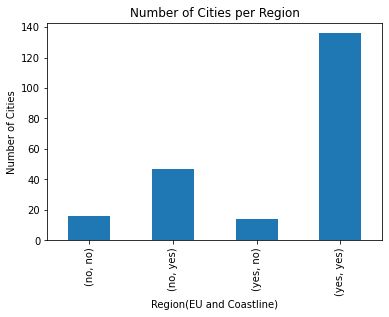

In [6]:
#Visualization Part 1
df_region = df.groupby(['EU','coastline']).count()['city'].to_frame('Number of Cities')
plt.figure()
plt.ylabel('Number of Cities')
df_region['Number of Cities'].plot(kind = 'bar')
plt.xlabel('Region(EU and Coastline)')
plt.title("Number of Cities per Region")
plt.show()

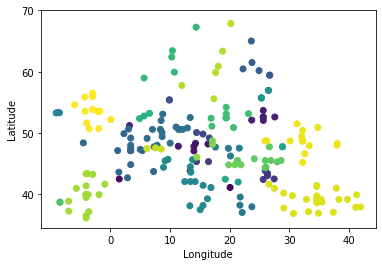

,country,latitude,longitude,Color
0,Albania,41.12,20.08,0.000000
1,Andorra,42.50,1.52,0.027778
2,Austria,47.85,11.41,0.055556
3,Austria,47.08,14.02,0.055556
4,Austria,48.32,14.29,0.055556
...,...,...,...,...
208,United Kingdom,55.95,-2.94,1.000000
209,United Kingdom,50.70,-3.53,1.000000
210,United Kingdom,53.55,-4.23,1.000000
211,United Kingdom,55.87,-4.25,1.000000


In [7]:
#Visualization Part 2
xlabel = df["longitude"]
ylabel = df["latitude"]
df2 = pd.DataFrame().assign(country=df['country'], latitude=df['latitude'], longitude=df['longitude'])
countries = np.unique(df2['country'])
# print(countries)
colors = np.linspace(0, 1, len(countries))
colordict = dict(zip(countries, colors))  

df2["Color"] = df2['country'].apply(lambda x: colordict[x])
plt.scatter(xlabel, ylabel, c=df2.Color)

plt.xlabel("Longitude", fontsize = 10)
plt.ylabel("Latitude", fontsize = 10)
plt.xticks(range(0, 50, 10))
plt.yticks(range(40, 80, 10))

plt.show()
df2

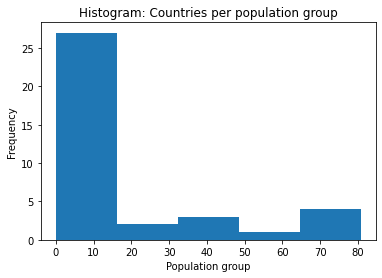

In [8]:
#Visualization Part 3
plt.figure()
plt.title('Histogram: Countries per population group')
plt.xlabel('Population group')
plt.ylabel('Frequency')
plt.hist(df['population'].unique(), bins = 5)
plt.show()

In [9]:
df['population']

0       2.90
1       0.07
2       8.57
3       8.57
4       8.57
       ...  
208    65.11
209    65.11
210    65.11
211    65.11
212    65.11
Name: population, Length: 213, dtype: float64

In [10]:
df_region

Number of Cities
EU  coastline                  
no  no                       16
    yes                      47
yes no                       14
    yes                     136

In [11]:
df3 = df
colorz = ['red', 'orange', 'blue']
df3["Color"] = df3['temperature'].apply(lambda x: colorz[0] if x > 10 else (colorz[1] if x >= 6 else colorz[2]) )

fdf1 = df3.loc[(df['EU'] == 'no') & (df['coastline'] == 'no')]
fdf2 = df3.loc[(df['EU'] == 'no') & (df['coastline'] == 'yes')]
fdf3 = df3.loc[(df['EU'] == 'yes') & (df['coastline'] == 'no')]
fdf4 = df3.loc[(df['EU'] == 'yes') & (df['coastline'] == 'yes')]

Text(0.5, 0.98, 'Latitude Vs. City per Region')

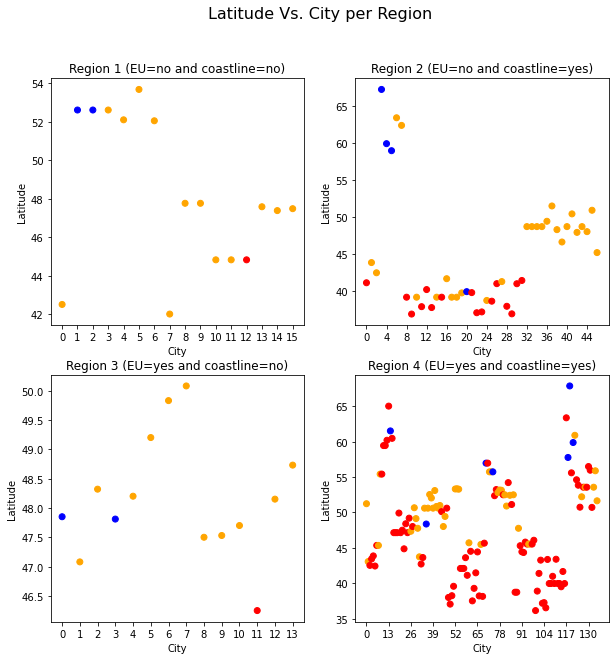

In [12]:
#Visualization Part 4
fig, axes = plt.subplots(2,2, figsize=(10,10))

axes[0,0].scatter(range(len(fdf1)), fdf1['latitude'], c=fdf1['Color'])
axes[0,0].set_xticks(range(len(fdf1)))
axes[0,0].set_xlabel('City')
axes[0,0].set_ylabel('Latitude')
axes[0,0].set_title('Region 1 (EU=no and coastline=no)')

axes[0,1].scatter(range(len(fdf2)), fdf2['latitude'], c=fdf2['Color'])
axes[0,1].set_xticks(np.arange(0, len(fdf2), int(len(fdf2)/10)))
axes[0,1].set_xlabel('City')
axes[0,1].set_ylabel('Latitude')
axes[0,1].set_title('Region 2 (EU=no and coastline=yes)')

axes[1,0].scatter(range(len(fdf3)), fdf3['latitude'], c=fdf3['Color'])
axes[1,0].set_xticks(range(len(fdf3)))
axes[1,0].set_xlabel('City')
axes[1,0].set_ylabel('Latitude')
axes[1,0].set_title('Region 3 (EU=yes and coastline=no)')

axes[1,1].scatter(range(len(fdf4)), fdf4['latitude'], c=fdf4['Color'])
#axes[1,1].set_xticks(range(len(fdf4)))
#np.arange(min(x), max(x)+1, 1.0))
axes[1,1].set_xticks(np.arange(0, len(fdf4), int(len(fdf4)/10)))
axes[1,1].set_xlabel('City')
axes[1,1].set_ylabel('Latitude')
axes[1,1].set_title('Region 4 (EU=yes and coastline=yes)')
fig.suptitle('Latitude Vs. City per Region', fontsize=16)
